В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

In [30]:
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy import stats

In [40]:
def test_results(z_stat, p_value, alpha):
    print(f"Значення: {z_stat}")
    print(f"P-значення: {p_value}")
    print(f"Рівень значущості: {alpha}")
    print("---")
    if p_value < alpha:
        print("\033[1mВідхилити H0\033[0m")
    else:
        print("\033[1mH0 не можна відхилити\033[0m")

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [5]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

**H0** - Середній зріст студентів вибірки heights **не відрізняється** від гіпотетичного середнього зросту всіх студентів університету (170см.)

**H1** - Середній зріст студентів вибірки heights import **відрізняється** від гіпотетичного середнього зросту всіх студентів університету (170см.)

*Оскільки ми хочемо дізнатися чи середнє значення вибірки heights (трошки рандомних студентів) відрізняється від гіпотетичного середнього значення генеральної сукупності (всіх студентів університету), то нашим значенням value я вказую 170см (з умови задачі).*

In [28]:
z_stat, p_value = ztest(x1=heights, value=170)

test_results(z_stat, p_value, 0.05)

Z-значення: 0.8482235371587619
P-значення: 0.39631349142183503
Рівень значущості: 0.05
---
H0 не можна відхилити


In [12]:
np.mean(heights)

np.float64(170.6969696969697)

**ВИСНОВОК**
- За висновком z-test ми не можемо відхилити нульову гіпотезу (що середній зріст студентів з нашої вибірки не відрізняється від гіпотетичного середнього зросту всіх студентів в університеті).
- Якщо вивести середнє значення вибірки то воно 170.7 що дуже наближено до 170
- **Відкидаємо альтернативну гіпотезу H1 - приймаємо нульову гіпотезу H0 - середнє значення вибірки не відрізняється від гіпотетичного середнього**

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [14]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

**H0** - Від зміни навчального курсу, оцінки студентів не змінюються

**H1** - Від зміни навчального курсу, оцінки студентів змінюються (покращуються)

In [29]:
z_stat, p_value = ztest(x1=group_a_scores, x2=group_b_scores, alternative="larger")

test_results(z_stat, p_value, 0.05)

Z-значення: 2.357354864751502
P-значення: 0.009202824276264007
Рівень значущості: 0.05
---
Відхилити H0


In [23]:
np.mean(group_a_scores), np.mean(group_b_scores)

(np.float64(77.08125), np.float64(74.73875000000001))

**ВИСНОВОК**
- За висновком z-тесту ми можемо відхилити нульову гіпотезу (що від зміни навчального курсу, оцінки студентів не змінюються)
- Якщо вивести середні значення вибірок, ми бачимо, що вони різняться і середній бал групи А більший - 77.08125 ніж групи В - 74.73875
- **Відкидаємо нульову гіпотезу Н0 - приймаємо альтернативну гіпотезу Н1 - оцінки в групі А кращі ніж в групи В - вводимо новий курс в навчальний процес**

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [41]:
t_stat, p_value = stats.ttest_ind(a=group_a_scores[:5], b=group_b_scores, equal_var=False)
test_results(t_stat, p_value, 0.05)

Значення: 1.1226527301193456
P-значення: 0.3010736990344311
Рівень значущості: 0.05
---
H0 не можна відхилити


*Ну, чесно кажучи, це очікувано, що розмір вибірок впливає*

In [42]:
np.mean(group_a_scores[:5]), np.mean(group_b_scores)

(np.float64(76.444), np.float64(74.73875000000001))

**ВИСНОВОК**
- За висновком t-тесту ми не можемо відхилити нульову гіпотезу (що від зміни навчального курсу, оцінки студентів не змінюються)
- Якщо вивести середні значення вибірок, ми бачимо, що вони різняться і середній бал групи А все ж більший - 76.444 ніж групи В - 74.73875, однак так як вказаний рівень значущості 0.05 - ми не можемо відхилити нульову гіпотезу
- **Відкидаємо альтернативну гіпотезу Н1 - приймаємо нульову гіпотезу Н0 - не можемо стверджувати, що оцінки в групі А кращі ніж в групи В - поки не вводимо новий курс в навчальний процес для всіх, збираємо більше даних**

*Я хочу ще спробувати змінити рівень значущості до 0.02 - адже в лекції Ганна каже, що це для дуже точних розрахунків*

In [43]:
t_stat, p_value = stats.ttest_ind(a=group_a_scores[:5], b=group_b_scores, equal_var=False)
test_results(t_stat, p_value, 0.02)

Значення: 1.1226527301193456
P-значення: 0.3010736990344311
Рівень значущості: 0.02
---
H0 не можна відхилити


*Все одно не можемо відхилити нульову гіпотезу*

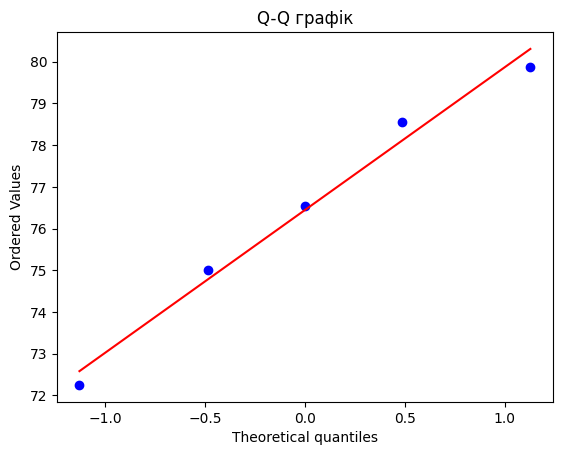

In [48]:
stats.probplot(group_a_scores[:5], dist="norm", plot=plt)
plt.title("Q-Q графік")
plt.show()

**Загальний висновок:** Треба почекати і зробити перевірку коли більше учнів, які вчаться за новою програмою пройдуть тести і отримають оцінки.


### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі справробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [49]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

*Думаю треба скористатися тестом ttest_rel, адже по опису він підходить:*

    Calculate the t-test on TWO RELATED samples of scores, a and b.
    
    This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

*Example: What is the effect of two different test prep programs on the average exam scores for students from the same class?*

In [57]:
t_stat, p_value = stats.ttest_rel(a=before_training, b=after_training, alternative="greater")
test_results(t_stat, p_value, 0.05)

Значення: -9.13890009623916
P-значення: 0.9999999997557063
Рівень значущості: 0.05
---
H0 не можна відхилити


In [55]:
np.mean(before_training), np.mean(after_training)

(np.float64(50.885999999999996), np.float64(54.03600000000001))

*По фактичним середнім вибірок, бачимо, що після тренінгу знання трішки кращі*

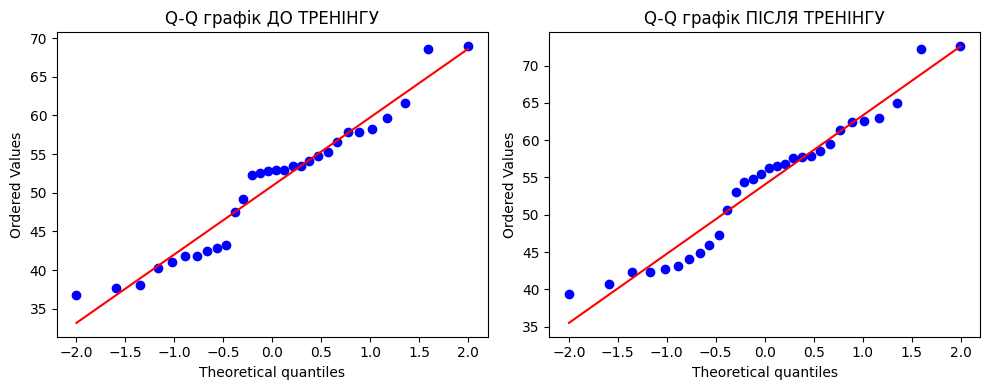

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

stats.probplot(before_training, dist="norm", plot=axs[0])
axs[0].set_title("Q-Q графік ДО ТРЕНІНГУ")

stats.probplot(after_training, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q графік ПІСЛЯ ТРЕНІНГУ")

plt.tight_layout()
plt.show()

**ВИСНОВОК**
- P-значення дуже велике, що не дає нам змоги відкинути нульову гіпотезу. Отже, різниця в результатах (продуктивності співробітників) **НЕ є статистично значущою.**
- Моя пропозиція - зробити провести інший тренінг, або ще краще - подумати про те, що можливо не тренінг впливає на продуктивність співробітників, а щось інше.